In [57]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='dark', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 


In [58]:
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,silhouette_score,confusion_matrix,accuracy_score 
from sklearn.linear_model import LogisticRegression,LinearRegression 
from sklearn.decomposition import PCA 
from sklearn.compose import ColumnTransformer 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans 
from sklearn.pipeline import Pipeline

In [59]:
data = pd.read_csv(r'c:\Github\Sol\the_data\data-lab-4-heart.csv')
data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [60]:
mis_val = data.isna().sum() * 100/len(data)

mis_val.sort_values(ascending=False)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [61]:
data.duplicated().sum()

data.drop_duplicates(keep='first', subset=None,inplace=True, ignore_index=False)

data.duplicated().sum()

0

<AxesSubplot:title={'center':'Correlation Matrix'}>

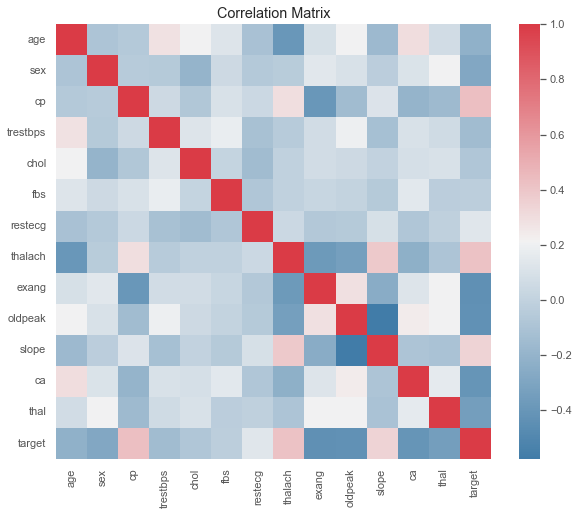

In [62]:
data_corr = data.corr()

f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Correlation Matrix')

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_), cmap=sns.diverging_palette(240,10, as_cmap=True), ax=ax, square=True)

In [63]:
num_val = ['age','trestbps','chol','thalach','oldpeak']
cat_val = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [64]:
colm_transf = ColumnTransformer( 
    [ 
        ('num', StandardScaler(), num_val),
        ('cat', OrdinalEncoder(), cat_val)
    ]
)

y = data.target
x = data.drop(columns=['target'])

x = pd.DataFrame(colm_transf.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1.0,3.0,0.0,0.0,0.0,0.0,1.0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1.0,2.0,1.0,0.0,0.0,0.0,2.0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,0.0,1.0,0.0,0.0,2.0,0.0,2.0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1.0,1.0,1.0,0.0,2.0,0.0,2.0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,0.0,0.0,1.0,1.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.285561,0.478910,-0.106449,-1.161988,-0.727060,0.0,0.0,1.0,1.0,1.0,0.0,3.0
298,-1.042904,-1.232023,0.338703,-0.768384,0.135360,1.0,3.0,1.0,0.0,1.0,0.0,3.0
299,1.503322,0.707035,-1.035462,-0.374779,2.032684,1.0,0.0,1.0,0.0,1.0,2.0,3.0
300,0.285561,-0.091401,-2.235438,-1.511859,0.135360,1.0,0.0,1.0,1.0,1.0,1.0,3.0


In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)


In [66]:
logreg = LogisticRegression()

logreg.fit(x_train,y_train)

y_true = y_test 
y_pred = logreg.predict(x_test)

accu = accuracy_score(y_true,y_pred).round(3)

mod_perf = pd.DataFrame( 
    [ 
        'LogisticRegression', accu
    ]
).transpose()

mod_perf.columns = ['Method', 'Test Accuracy']

mod_perf

,Method,Test Accuracy
0,LogisticRegression,0.824


c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Accuracy Test'}>

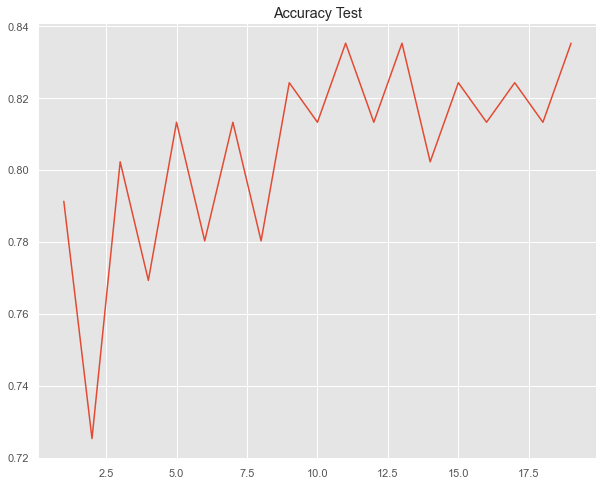

In [67]:
accuracies = []

for N in range(1,20):

    knn = KNeighborsClassifier(n_neighbors=N)

    knn.fit(x_train,y_train)

    y_true = y_test 

    y_pred = knn.predict(x_test)

    accu = accuracy_score(y_true,y_pred)

    accuracies.append(accu)

accuracies = np.array(accuracies)

f,ax = plt.subplots(figsize=(10,8))
ax.set_title('Accuracy Test')

sns.lineplot(np.arange(1,20),accuracies, ax=ax)

In [68]:
best_k = np.argmax(accuracies)
best_k 

10

In [69]:
best_accu = np.max(accuracies)
best_accu

0.8351648351648352

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted Names', ylabel='True Values'>

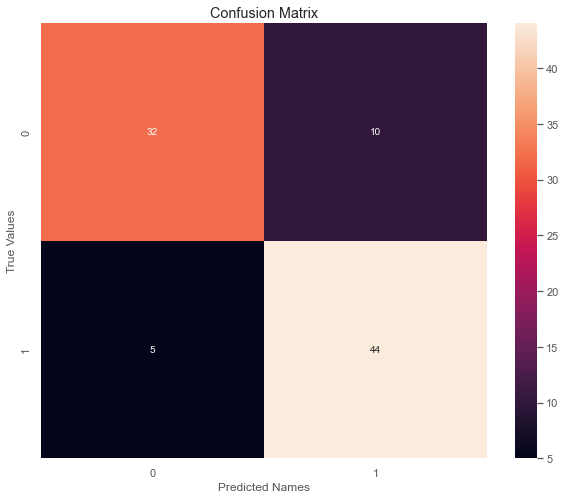

In [70]:
colm_dic = { 
    'y_true':y_true,
    'y_pred':y_pred
}

conm_cols = pd.DataFrame( 
    colm_dic, columns=['y_true','y_pred']
)

confusion_matrix = pd.crosstab( 
    conm_cols['y_true'], conm_cols['y_pred'], rownames=['True Values'], colnames=['Predicted Names']
)

f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Confusion Matrix')

sns.heatmap(confusion_matrix, annot=True, ax=ax)